In [ ]:
#imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [ ]:
 df= pd.read_csv("selectedfeatures.csv")  # Replace with your dataset path
 X = df.drop("num", axis=1)        # Replace 'target' with your target column
 y = df["num"]

In [6]:
#splitting and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)


In [25]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

trained_models = {}
metrics = {}

In [33]:

for name, model in models.items():

        if name in ["Logistic Regression", "SVM"]:
            model.fit(X_trainScaled, y_train)
            y_pred = model.predict(X_testScaled)
            y_proba = model.predict_proba(X_testScaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)

        metrics[name] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, average="weighted", zero_division=0),
            "Recall": recall_score(y_test, y_pred, average="weighted", zero_division=0),
            "F1-score": f1_score(y_test, y_pred, average="weighted", zero_division=0)
        }

        trained_models[name] = model




In [34]:
#printing metrics

for model_name, metric in metrics.items():
    print(f"\n{model_name} Performance:")
    for key, value in metric.items():
        print(f"{key}: {value:.4f}")



SVM Performance:
Accuracy: 0.5574
Precision: 0.4768
Recall: 0.5574
F1-score: 0.5066

Logistic Regression Performance:
Accuracy: 0.6066
Precision: 0.4949
Recall: 0.6066
F1-score: 0.5370

Decision Tree Performance:
Accuracy: 0.4754
Precision: 0.4859
Recall: 0.4754
F1-score: 0.4720

Random Forest Performance:
Accuracy: 0.4918
Precision: 0.4889
Recall: 0.4918
F1-score: 0.4797


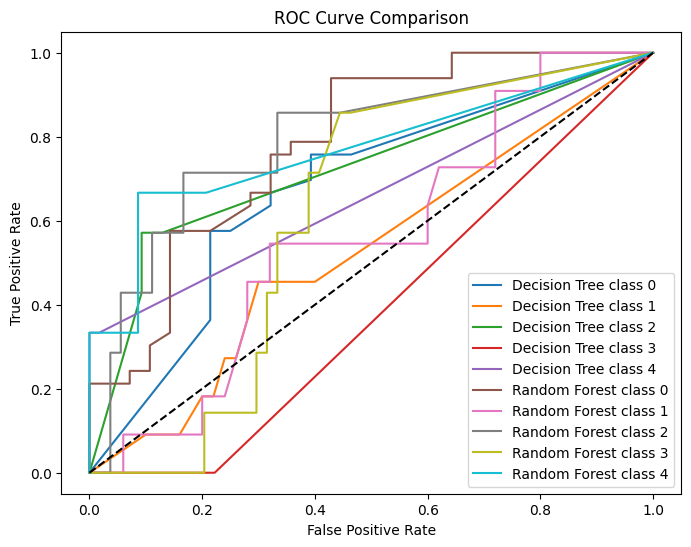

In [35]:
#plotting for visualization
plt.figure(figsize=(8,6))
for name, model in trained_models.items():
    if name in ["Logistic Regression", "SVM"]:
        y_proba = model.predict_proba(X_testScaled)
    else:
        y_proba = model.predict_proba(X_test)


        for i in range(y_proba.shape[1]):
            fpr, tpr, _ = roc_curve(y_test==i, y_proba[:,i])
            plt.plot(fpr, tpr, label=f"{name} class {i}")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()